# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [55]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [56]:
#Calculating AOV
orders["order_value"].mean()

3145.128

"\nObviously, there are some extreme values that are messing with the mean.\nOne sneaker was sold at 704000, which is much more larger than the normal price.\nIn this case, median would be a better metric, because it's less affected by extreme values.\n"

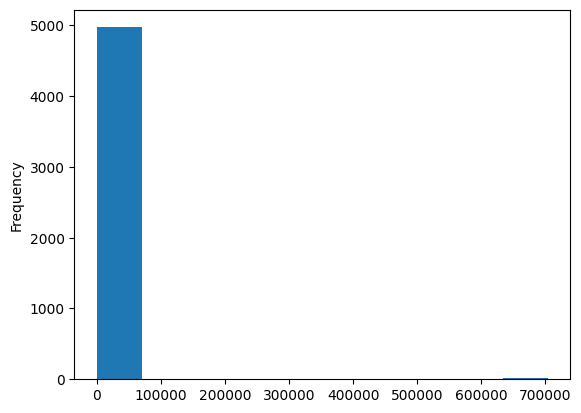

In [57]:
orders["order_value"].plot.hist()
max(orders["order_value"])
'''
Obviously, there are some extreme values that are messing with the mean.
One sneaker was sold at 704000, which is much more larger than the normal price.
In this case, median would be a better metric, because it's less affected by extreme values.
'''

In [58]:
#Calculating median
orders["order_value"].median()
#Median is at 284 USD, which is much more representative of the shoppers' behavior.

284.0

In [87]:
orders["created_at"] = pd.to_datetime(orders["created_at"])
#The dataset contains only information from 2017 March, so we will be analyzing daily orders and hourly orders.
orders["date"] = orders["created_at"].dt.day
orders["hour"] = orders["created_at"].dt.hour
orders.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,date,hour
0,1,53,746,224,2,cash,2017-03-13 12:36:56,13,12
1,2,92,925,90,1,cash,2017-03-03 17:38:52,3,17
2,3,44,861,144,1,cash,2017-03-14 04:23:56,14,4
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,26,12
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,1,4


In [84]:
daily_orders = orders.groupby("date")["total_items"].sum()
hourly_orders = orders.groupby("hour")["total_items"].sum()

date
1      359
2     4351
3      324
4     2313
5      320
6      277
7     4378
8      287
9      419
10     319
11    2344
12    2328
13     332
14     295
15    2268
16     285
17    2384
18     374
19    2294
20     313
21     340
22    2341
23     329
24    4322
25    2330
26     353
27     354
28    6354
29     323
30     326
Name: total_items, dtype: int64

Text(0.5, 1.0, 'Hourly Sales Trends')

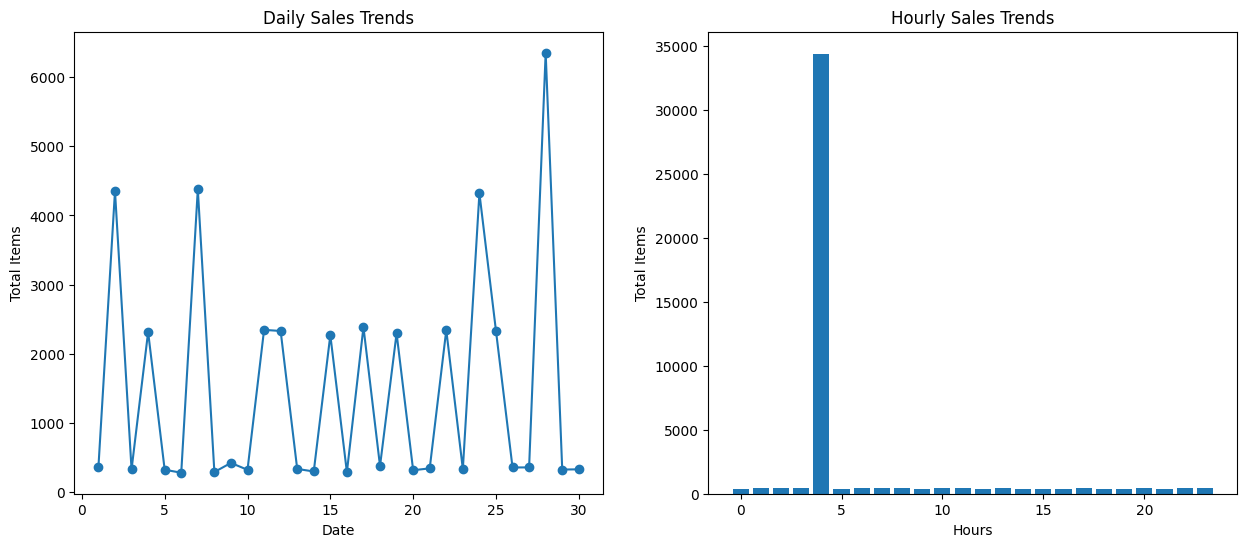

In [82]:
plt.figure(figsize=(15, 6))

# By date
plt.subplot(1, 2, 1)
plt.plot(daily_orders.index, daily_orders.values, marker = "o")
plt.xlabel("Date")
plt.ylabel("Total Items")
plt.title("Daily Sales Trends")

# By hour
plt.subplot(1, 2, 2)
plt.bar(hourly_orders.index, hourly_orders.values)
plt.xlabel("Hours")
plt.ylabel("Total Items")
plt.title("Hourly Sales Trends")

In [ ]:
'''
In terms of daily sale trends, Customers seem to purchase most items at the start and end of the month.
In particular, the sales amount peaked towards the end of the month at 28th.
In terms of hourly sale trends, most of the orders are placed at 4 am specifically.
'''